In [1]:
import numpy as np

### 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있다
# 신경망 학습에서  사용하는 지표는 손실함수loss_function*라고 한다.

# MSE(Mean Square Error) : 평균 제곱 오차
def mean_square_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# CEE(Cross Entropy Error) : 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta)) # one-hot-encoding 값이므로 정답인 경우의 추정값의 자연로그를 계산하는 값

# X1. 교체 엔트로피 함수를 차트로 그려보자

# 어쨌거나 결과는 어느 에러함수를 사용하든지 오차값이 적은 쪽의 결과로 수렴하도록 파라메터를 튜닝하는 것이 목적

# Q1. 왜 이러한 두 가지 방식을 쓰며, 어떤 각 각의 장.단점이 있는가?


In [2]:
# Q2. 왜 분류에서는 softmax 함수를 쓰는가?

# 미니배치(mini-batch): 너무 큰 데이터를 전체를 모두 학습에 쓰기에 부담되기 때문에, 일부를 샘플링하여 학습에 사용하는 방법 
np.random.choice(60000, 10)

array([29370, 34557, 10846, 52086, 41381, 34480, 33320, 53725, 10914, 33822])

0.1999999999990898


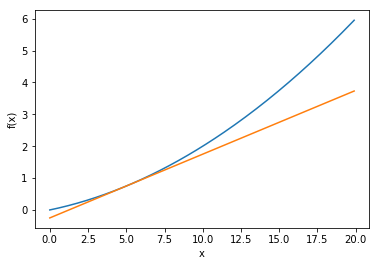

In [1]:
### 수치미분을 통한 1차원 기울기 

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x): # 수치미분: 아주 작은 차분으로 미분하는 방식
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x # 해석적 해는 0.02x + 0.1 이 되고 이를 '도함수'라고 부른다

def tangent_line(f, x): # 탄젠트 라인 = 접선 - http://blog.naver.com/PostView.nhn?blogId=sodong212&logNo=130155152200
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5) # x가 5 혹은 10인 경우의 이 함수의 미분을 계산하시오.
y2 = tf(x) #  y2는 function_1 을 미분한 직선의 방정식

# https://m.blog.naver.com/sbssbi69/90164383713 : 미분과 접선의 방정식
# '미분'으로 할 수 있는 것은 그래프의 접점에서의 접선의 방정식을 구하는 것이며, 미분계수는 그 접점에서의 순간 기울기를 말한다.
# 임의의 점에서의 미분계수를 구하기 위해서는 도함수를 통해서 임의의 점에서의 미분계수를 구할 수 있다

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

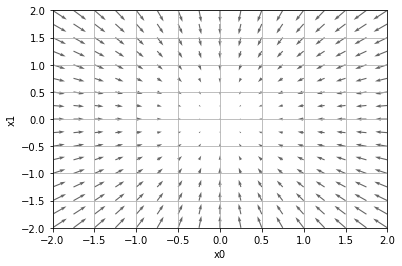

In [4]:
### 수치미분을 통한 2차원 기울기 
import warnings
warnings.filterwarnings('ignore')
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

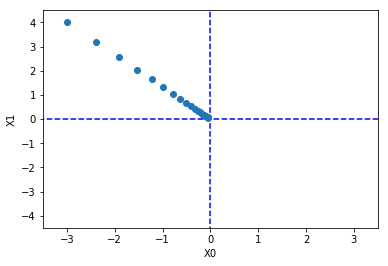

In [6]:
###

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
# from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [10]:
###  그레디언트 심플넷

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)


[[ 0.07897194  0.48571309 -0.56468503]
 [ 0.11845791  0.72856964 -0.84702755]]


In [13]:
### 뉴럴 네트워크 코어

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
np.matrix

numpy.matrixlib.defmatrix.matrix

train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.7944, 0.7981
train acc, test acc | 0.876266666667, 0.881
train acc, test acc | 0.898666666667, 0.9018
train acc, test acc | 0.90855, 0.9118
train acc, test acc | 0.91425, 0.9178
train acc, test acc | 0.920016666667, 0.9215
train acc, test acc | 0.923433333333, 0.926
train acc, test acc | 0.927383333333, 0.9289
train acc, test acc | 0.930616666667, 0.9323
train acc, test acc | 0.93455, 0.9353
train acc, test acc | 0.937733333333, 0.9377
train acc, test acc | 0.939366666667, 0.9397
train acc, test acc | 0.94125, 0.9415
train acc, test acc | 0.943466666667, 0.942
train acc, test acc | 0.945016666667, 0.9439
train acc, test acc | 0.947, 0.9448


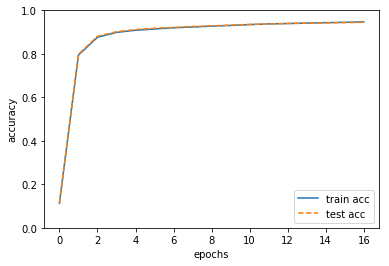

In [12]:
### 뉴럴 네트워크 학습하기

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [23]:
### 뉴럴 네트워크 코어 - #2

# coding: utf-8

class ThreeLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        print("shape[W1] : %s", self.params['W1'].shape)
        print("shape[W2] : %s", self.params['W2'].shape)
        print("shape[W3] : %s", self.params['W3'].shape)
        print("shape[b1] : %s", self.params['b1'].shape)
        print("shape[b2] : %s", self.params['b2'].shape)
        print("shape[b3] : %s", self.params['b3'].shape)

    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3 # ValueError: shapes (100,10) and (50,10) not aligned: 10 (dim 1) != 50 (dim 0)
        y = softmax(a3)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient(loss_W, self.params['b3'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)
        
        # backward
        dy = (y - t) / batch_num
        grads['W3'] = np.dot(z2.T, dy)
        grads['b3'] = np.sum(dy, axis=0)
        
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
np.matrix



numpy.matrixlib.defmatrix.matrix

In [24]:
### 뉴럴 네트워크 학습하기 - #2

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
# from two_layer_net import ThreeLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = ThreeLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

shape[W1] : %s (784, 50)
shape[W2] : %s (50, 50)
shape[W3] : %s (50, 10)
train acc, test acc | 0.102183333333, 0.101


KeyboardInterrupt: 